# Final Project Submission

Please fill out:
* Student name: Stephen Mwangi Thuo
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Project Overview
Performing Regression analysis on housing data. The project will determine what features a real estate agency should focus on to ensure their units fetch higher prices in the market and give actionable recommendations. 

# Business Problem

A housing agency seeks to determine what features of house units determine the prices. Using this information the agency can advise home owners on what features will ensure better market price for their houses. 

# Data Understanding
To perform the analysis we have data from Kings County.

### Loading The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Your code here - remember to use markdown cells for comments as well!

data = pd.read_csv('kc_house_data.csv')

# previewing the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Getting the shape of the data
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 21597 rows and 21 columns


In [5]:
# Previewing the columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Dropping columns
cols_to_drop = ['id', 'date','view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
data.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
# Checking the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


* There exist missing values in waterfront and view columns.

# Scrubbing and Cleaning Data

### Dealing With Missing Values

In [8]:
# From inspection of the value counts, the null values seems to represent lack of a waterfront
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
# Replacing the null values with 0
data['waterfront'].fillna(value=0.0, inplace=True)

In [10]:
# Value count after fill null values
data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

###### Comment:
* From the data only 146 houses have a waterfront

In [11]:
# Previewing the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [12]:
# Previewing the dataset
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


### Checking For Duplicated

In [6]:
data.duplicated().sum()

8

In [15]:
# Previewing the duplicated data
data[data.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3947,550000.0,4,1.75,2410,8447,2.0,0.0,4,8,1936
4348,259950.0,2,2.00,1070,649,2.0,0.0,3,9,2008
14969,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2001
17228,629950.0,3,2.50,1680,1683,2.0,0.0,3,9,2014
20038,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,2009
20508,529500.0,3,2.25,1410,905,3.0,0.0,3,9,2014
21458,359800.0,5,2.50,2170,2752,2.0,0.0,3,8,2014
21518,599000.0,3,1.75,1650,1180,3.0,0.0,3,8,2014


In [7]:
# Dropping the duplicated data
data.drop_duplicates(keep='last', inplace=True)

In [18]:
# Verification of no duplicates in the data
data.duplicated().sum()

0

### Checking For Outliers

In [19]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.158900e+04,21589.000000,21589.000000,21589.000000,2.158900e+04,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000
mean,5.403083e+05,3.373246,2.115788,2080.415536,1.510390e+04,1.493816,0.006763,3.409931,7.657603,1970.988466
std,3.674283e+05,0.926330,0.769100,918.225876,4.141963e+04,0.539522,0.081959,0.650612,1.173266,29.370950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


###### Comment:
* The Bedrooms column has an outlier; The column has a minimum value of 1 and mean of 3.3, thus a maximum value of 33 is way off

In [8]:
# Dropping the outlier row
data = data[data.bedrooms != 33]

In [22]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.158800e+04,21588.000000,21588.000000,21588.000000,2.158800e+04,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000
mean,5.403037e+05,3.371873,2.115805,2080.436863,1.510432e+04,1.493839,0.006763,3.409857,7.657634,1970.989578
std,3.674362e+05,0.904137,0.769114,918.241797,4.142054e+04,0.539524,0.081961,0.650537,1.173284,29.371176
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.041500e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


### Checking The Distribution of Data

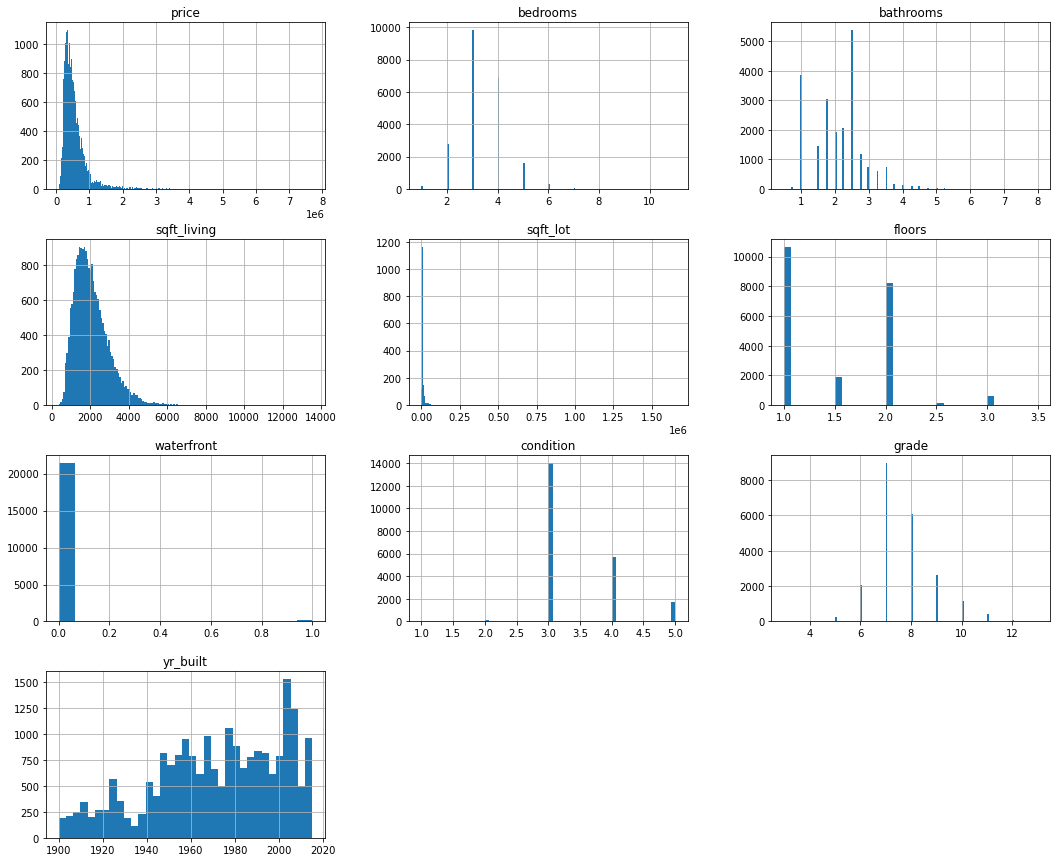

In [24]:
data.hist(figsize=(18,15), bins='auto');

### Inspecting the Data Per column

#### Bedrooms

In [27]:
data['bedrooms'].value_counts(normalize=True)

3     0.454836
4     0.318742
2     0.127802
5     0.074115
6     0.012600
1     0.009079
7     0.001760
8     0.000602
9     0.000278
10    0.000139
11    0.000046
Name: bedrooms, dtype: float64

###### Comment:
* Most houses have 2 to 4 bedrooms.
* 1,5,6,7,8,9,10 and 11 bedroom houses contribute less than 1% each of the number of house in the data.
* There is only one house with 11 bedrooms which needs further investigation to determine whether its an error and whether to treat it as an outlier.
* This column should be treated as continuous due to the wide range of values.

Text(0.5, 1.0, 'Distribution of Price and No. of Bedrooms')

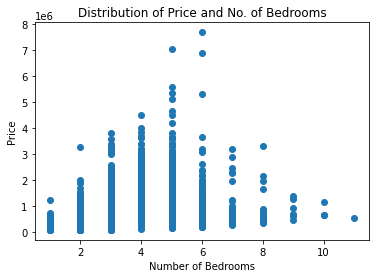

In [11]:
plt.scatter(data['bedrooms'],data['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Distribution of Price and No. of Bedrooms')

#### Bathrooms

In [29]:
data['bathrooms'].value_counts()

2.50    5373
1.00    3851
1.75    3045
2.25    2046
2.00    1929
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Text(0.5, 1.0, 'Distribution of Price and No. of Bathrooms')

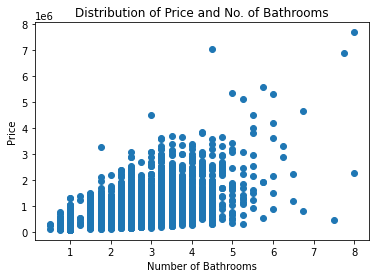

In [12]:
plt.scatter(data['bathrooms'],data['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Distribution of Price and No. of Bathrooms')

##### Comment:
* Most houses in the Data set have between 1 and 2.75 bathrooms.
* This column should be treated as a continuous variable.

#### Floors

In [30]:
data['floors'].value_counts()

1.0    10672
2.0     8229
1.5     1910
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

Text(0.5, 1.0, 'Distribution of Price and No. of Floors')

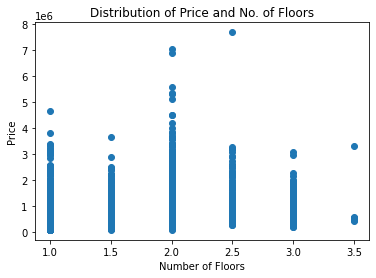

In [13]:
plt.scatter(data['floors'],data['price'])
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.title('Distribution of Price and No. of Floors')

#### Comment:
* Most houses have between 1 and 2 floors.
* Above 2 Floors the theirs no increase in the house prices.
* This column should be treated as a categorical column due to the limited range of values.

#### Condition

In [31]:
data['condition'].value_counts()

3    14013
4     5676
5     1700
2      170
1       29
Name: condition, dtype: int64

Text(0.5, 1.0, 'Distribution of Price and Condition')

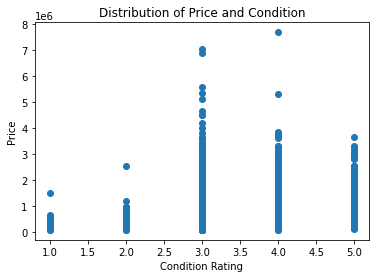

In [14]:
plt.scatter(data['condition'],data['price'])
plt.xlabel('Condition Rating')
plt.ylabel('Price')
plt.title('Distribution of Price and Condition')

#### Comment: 
* Most houses are given a condition value of between 3 and 5
* Above the rating of 4 the price of the house units does not increase.
* This column should be treated a categorical column


#### Rating

In [32]:
data['grade'].value_counts()

7     8973
8     6061
9     2611
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Text(0.5, 1.0, 'Distribution of Price and Rating')

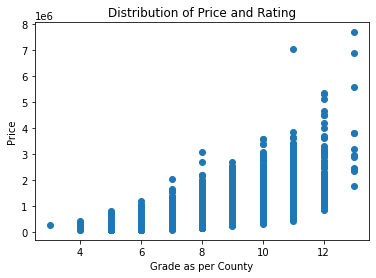

In [15]:
plt.scatter(data['grade'],data['price'])
plt.xlabel('Grade as per County')
plt.ylabel('Price')
plt.title('Distribution of Price and Rating')

#### Comment:
* Most houses are graded between 6 and 10.
* The higher the grade given the higher the price a unit fetches.
* Due to the wide range of rating we will treat this variable as continuous.

#### Year Built

In [33]:
data['yr_built'].value_counts()

2014    555
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Text(0.5, 1.0, 'Distribution of Price and Year Built')

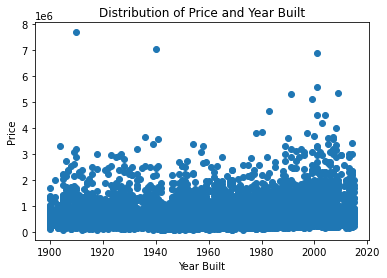

In [16]:
plt.scatter(data['yr_built'],data['price'])
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Distribution of Price and Year Built')

##### Comment:
* Most house were built in 2014
* This column should be treated as continuous variable due to the wide range of values

In [35]:
# Data continuous and categorical variables
categorical = [ 'floors', 'waterfront', 'condition']
continuous = ['grade', 'bathrooms', 'bedrooms','price', 'sqft_living', 'sqft_lot','yr_built']

Text(0.5, 1.0, 'Distribution of Price and Footage')

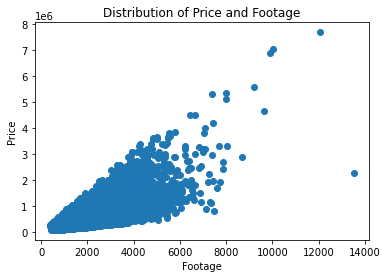

In [18]:
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Footage')
plt.ylabel('Price')
plt.title('Distribution of Price and Footage')

### Dealing With Data Types

In [36]:
# Converting all categorical columns in the data set to object
for col in categorical:
    data[col] = data[col].astype('str')
    

In [37]:
# Previewing the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21588 non-null  float64
 1   bedrooms     21588 non-null  int64  
 2   bathrooms    21588 non-null  float64
 3   sqft_living  21588 non-null  int64  
 4   sqft_lot     21588 non-null  int64  
 5   floors       21588 non-null  object 
 6   waterfront   21588 non-null  object 
 7   condition    21588 non-null  object 
 8   grade        21588 non-null  int64  
 9   yr_built     21588 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.8+ MB


In [38]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [39]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built
count,2.158800e+04,21588.000000,21588.000000,21588.000000,2.158800e+04,21588.000000,21588.000000
mean,5.403037e+05,3.371873,2.115805,2080.436863,1.510432e+04,7.657634,1970.989578
std,3.674362e+05,0.904137,0.769114,918.241797,4.142054e+04,1.173284,29.371176
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.041500e+03,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,8.000000,1997.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,13.000000,2015.000000


* The mean price is 540303.7
* The mean of the footage housing living space is 2080.43
* The mean footage of the lot is 15104.3

### Checking For Linearity

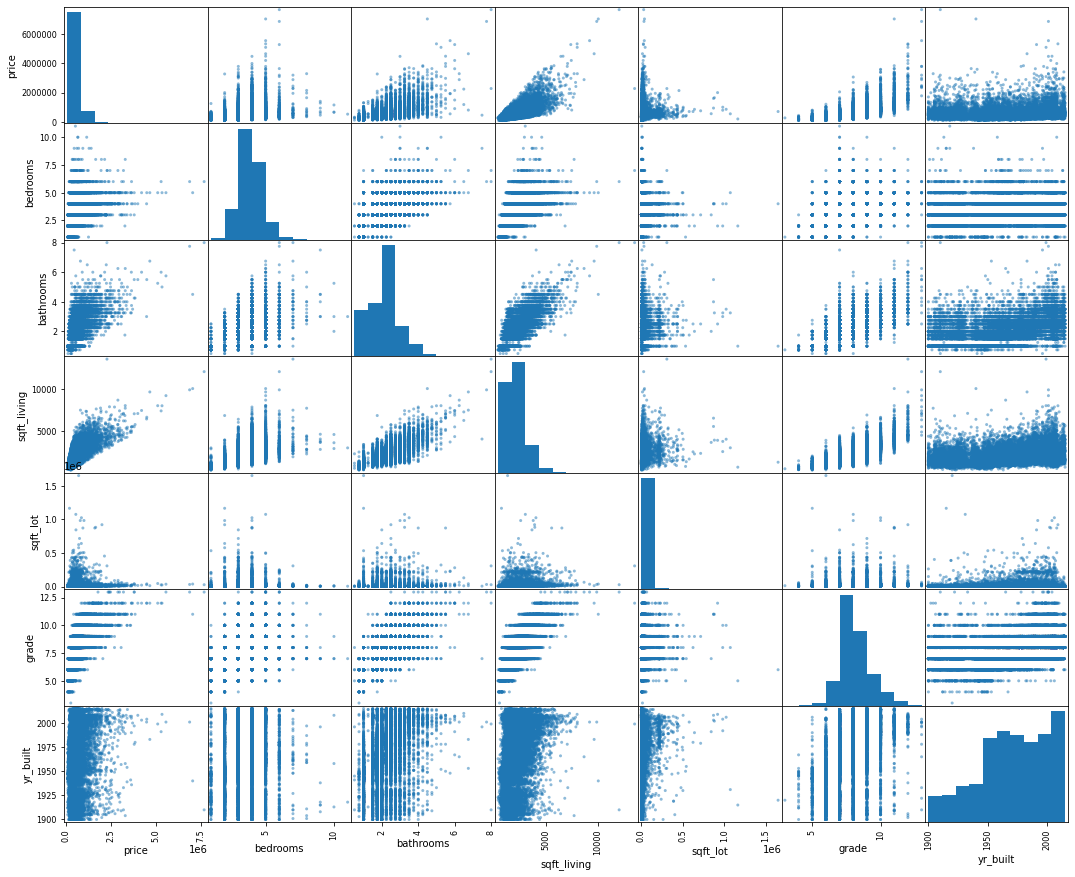

In [41]:
pd.plotting.scatter_matrix(data, figsize=[18,15]);

In [42]:
# Correlation between the variables
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built
price,1.000000,0.316014,0.525946,0.701952,0.089871,0.668091,0.054029
bedrooms,0.316014,1.000000,0.527958,0.593179,0.033584,0.366403,0.160947
bathrooms,0.525946,0.527958,1.000000,0.755825,0.088389,0.665888,0.507233
sqft_living,0.701952,0.593179,0.755825,1.000000,0.173423,0.763027,0.318450
sqft_lot,0.089871,0.033584,0.088389,0.173423,1.000000,0.114824,0.053086
grade,0.668091,0.366403,0.665888,0.763027,0.114824,1.000000,0.447743
yr_built,0.054029,0.160947,0.507233,0.318450,0.053086,0.447743,1.000000


#### Comment:
* Price has high positive correlation with sqft_living (footage of living space).
* A moderate positive correlation also exist between price, bathrooms and the grade.

### One-Hot Encoding Categorical Columns

In [44]:
categorical

['floors', 'waterfront', 'condition']

In [45]:
# Getting dummies for categorical data
floors_dummies = pd.get_dummies(data['floors'], prefix='flr', drop_first=True)
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='cdn', drop_first=True)

In [46]:
# Removing the original data from the dataset and adding the dummy columns
data = data.drop(['floors','waterfront','condition'], axis=1)

In [47]:
data = pd.concat([data, 
                  floors_dummies, 
                  waterfront_dummies, 
                  condition_dummies,],
                axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wf_1.0,cdn_2,cdn_3,cdn_4,cdn_5
0,221900.0,3,1.00,1180,5650,7,1955,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,7,1951,0,1,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,6,1933,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,7,1965,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,8,1987,0,0,0,0,0,0,0,1,0,0


# Exploring The Data

### Sorting the Distribution the continuous Variables
* From the histograms earlier, the footage of the interior space and lot are skewed to the right.
* To ensure better performance of the regression model, we will perform a log tranform and normalize the two columns.

In [48]:
continuous

['grade',
 'bathrooms',
 'bedrooms',
 'price',
 'sqft_living',
 'sqft_lot',
 'yr_built']

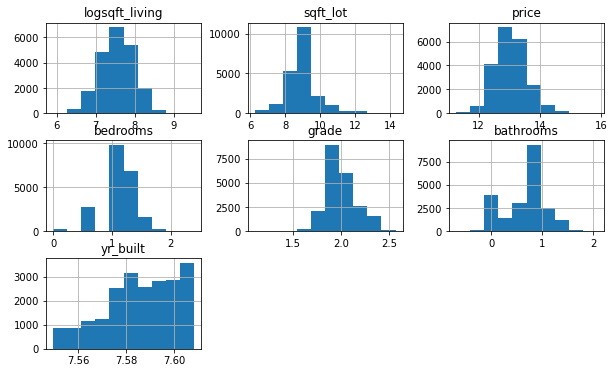

In [49]:
data_log = pd.DataFrame([])
data_log['logsqft_living'] = np.log(data['sqft_living'])
data_log['sqft_lot'] = np.log(data['sqft_lot'])
data_log['price'] = np.log(data['price'])
data_log['bedrooms'] = np.log(data['bedrooms'])
data_log['grade'] = np.log(data['grade'])
data_log['bathrooms'] = np.log(data['bathrooms'])
data_log['yr_built'] = np.log(data['yr_built'])
data_log.hist(figsize  = [10, 6]);

* After the log transformation the continuous variables above are fairly normally distributed.

In [50]:
# Scaling the features
scaled_sqft_living = ((data_log['logsqft_living'] - min(data_log['logsqft_living']))) / ((max(data_log['logsqft_living']) - min(data_log['logsqft_living'])))
scaled_sqft_lot = ((data_log['sqft_lot'] - min(data_log['sqft_lot']))) / ((max(data_log['sqft_lot']) - min(data_log['sqft_lot'])))
scaled_price = ((data_log['price'] - min(data_log['price']))) / ((max(data_log['price']) - min(data_log['price'])))
scaled_year = ((data_log['yr_built'] - min(data_log['yr_built']))) / ((max(data_log['yr_built']) - min(data_log['yr_built'])))
scaled_bathrooms = ((data_log['bathrooms'] - min(data_log['bathrooms']))) / ((max(data_log['bathrooms']) - min(data_log['bathrooms'])))
scaled_grade = ((data_log['grade'] - min(data_log['grade']))) / ((max(data_log['grade']) - min(data_log['grade'])))
scaled_bedrooms = ((data_log['bedrooms'] - min(data_log['bedrooms']))) / ((max(data_log['bedrooms']) - min(data_log['bedrooms'])))

In [51]:
# Adding the scaled data to the data frame
data['sqft_living'] = scaled_sqft_living
data['sqft_lot'] = scaled_sqft_lot
data['price'] = scaled_price
data['yr_built'] = scaled_year
data['bathrooms'] = scaled_bathrooms
data['grade'] = scaled_grade
data['bedrooms'] = scaled_bedrooms

In [52]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wf_1.0,cdn_2,cdn_3,cdn_4,cdn_5
0,0.227669,0.458157,0.250000,0.322166,0.295858,0.577833,0.485598,0,0,0,0,0,0,0,1,0,0
1,0.420522,0.458157,0.542481,0.538392,0.326644,0.577833,0.450745,0,1,0,0,0,0,0,1,0,0
2,0.182099,0.289065,0.250000,0.203585,0.366664,0.472707,0.293018,0,0,0,0,0,0,0,1,0,0
3,0.445720,0.578130,0.646241,0.463123,0.280700,0.577833,0.572419,0,0,0,0,0,0,0,0,0,1
4,0.408883,0.458157,0.500000,0.420302,0.340224,0.668898,0.761879,0,0,0,0,0,0,0,1,0,0


# Data Modeling

### Fitting an Initial Model

In [53]:
# Replace the the perios . with _ for smooth running of the model
data.columns = [col.replace('.', '_') for col in data.columns]

In [54]:
target_data = data['price']
predictor_data = data.drop('price', axis=1)

predictor_data

,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5,wf_1_0,cdn_2,cdn_3,cdn_4,cdn_5
0,0.458157,0.250000,0.322166,0.295858,0.577833,0.485598,0,0,0,0,0,0,0,1,0,0
1,0.458157,0.542481,0.538392,0.326644,0.577833,0.450745,0,1,0,0,0,0,0,1,0,0
2,0.289065,0.250000,0.203585,0.366664,0.472707,0.293018,0,0,0,0,0,0,0,1,0,0
3,0.578130,0.646241,0.463123,0.280700,0.577833,0.572419,0,0,0,0,0,0,0,0,0,1
4,0.458157,0.500000,0.420302,0.340224,0.668898,0.761879,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.458157,0.580482,0.394322,0.096366,0.668898,0.949254,0,0,0,1,0,0,0,1,0,0
21593,0.578130,0.580482,0.508764,0.299385,0.668898,0.991553,0,1,0,0,0,0,0,1,0,0
21594,0.289065,0.146241,0.281690,0.118318,0.577833,0.949254,0,1,0,0,0,0,0,1,0,0
21595,0.458157,0.580482,0.406749,0.189052,0.668898,0.906850,0,1,0,0,0,0,0,1,0,0


In [55]:
# Defining the problem
target = 'price'

predictor = [x for x in predictor_data.columns]

predictor[:5]

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']

In [56]:
from statsmodels.formula.api import ols

In [61]:
# Fitting the actual model
predictors = '+'.join(predictor)
formula = target + '~' + predictors
model1 = ols(formula=formula, data=data).fit()
# model1.summary()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2413.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:52:46   Log-Likelihood:                 27194.
No. Observations:               21588   AIC:                        -5.435e+04
Df Residuals:                   21571   BIC:                        -5.422e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0491      0.013     -3.748      0.000      -0.075      -0.023
bedrooms       -0.0981      0.005    -18.188      0.000      -0.109      -0.088
bathrooms       0.0692      0.006     11.540      0.000       0.057       0.081
sqft_living     0.4007      0.009     45.637      0.000       0.384       0.418
sqft_lot       -0.0573      0.005    -11.542      0.000      -0.067      -0.048
grade           0.5796      0.008     76.713      0.000       0.565       0.594
yr_built       -0.1521      0.003    -56.513      0.000      -0.157      -0.147
flr_1_5         0.0043      0.002      2.368      0.018       0.001       0.008
flr_2_0         0.0066      0.001      4.899      0.000       0.004       0.009
flr_2_5         0.0153      0.006      2.757      0.006       0.004       0.026
flr_3_0         0.0435      0.003     13.357      0.000       0.037       0.050
flr_3_5         0.0392      0.026      1.506      0.132      -0.012       0.090
wf_1_0          0.1256      0.006     21.797      0.000       0.114       0.137
cdn_2          -0.0151      0.014     -1.093      0.274      -0.042       0.012
cdn_3           0.0103      0.013      0.804      0.421      -0.015       0.035
cdn_4           0.0137      0.013      1.068      0.285      -0.011       0.039
cdn_5           0.0272      0.013      2.107      0.035       0.002       0.052
==============================================================================
Omnibus:                      129.462   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.770
Skew:                           0.019   Prob(JB):                     2.28e-42
Kurtosis:                       3.460   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The Initial model has an R2 value of 0.642: Which means our features explain 64.2% of the changes in target variable (price).
* Based on the above results, the below columns have a pvalue more than 0.05 making them insignificant in our model:
    * flr_3_5
    * cdn_2
    * cdn_3
    * cdn_4

In [62]:
insignificant_cols = ['flr_3_5', 'cdn_2', 'cdn_3', 'cdn_4']
 

In [63]:
# Dropping insignificant features
data = data.drop(insignificant_cols, axis=1)

### Rerunning the Model after dropping insignificant columns

In [66]:
target = 'price'
pred_cols = [col for col in data.columns[1:]]

In [67]:
predictors = '+'.join(pred_cols)
formula = target + '~' + predictors
model2 = ols(formula=formula, data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3209.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:03:40   Log-Likelihood:                 27176.
No. Observations:               21588   AIC:                        -5.433e+04
Df Residuals:                   21575   BIC:                        -5.422e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0390      0.004    -10.562      0.000      -0.046      -0.032
bedrooms       -0.0971      0.005    -18.002      0.000      -0.108      -0.087
bathrooms       0.0698      0.006     11.633      0.000       0.058       0.082
sqft_living     0.4015      0.009     45.702      0.000       0.384       0.419
sqft_lot       -0.0582      0.005    -11.771      0.000      -0.068      -0.048
grade           0.5812      0.008     77.023      0.000       0.566       0.596
yr_built       -0.1530      0.003    -57.970      0.000      -0.158      -0.148
flr_1_5         0.0041      0.002      2.276      0.023       0.001       0.008
flr_2_0         0.0058      0.001      4.343      0.000       0.003       0.008
flr_2_5         0.0146      0.006      2.634      0.008       0.004       0.026
flr_3_0         0.0425      0.003     13.073      0.000       0.036       0.049
wf_1_0          0.1256      0.006     21.786      0.000       0.114       0.137
cdn_5           0.0158      0.002      8.720      0.000       0.012       0.019
==============================================================================
Omnibus:                      125.996   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.118
Skew:                           0.012   Prob(JB):                     3.85e-41
Kurtosis:                       3.454   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* After dropping the insignificant columns with pvalue > 0.05, our model performance remained the same with an R2 value of 0.641 which means that our model explains 64.1% changes in our target variable price.

### Checking For Multicollinearity

In [68]:
# preview of the data
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,flr_1_5,flr_2_0,flr_2_5,flr_3_0,wf_1_0,cdn_5
0,0.227669,0.458157,0.250000,0.322166,0.295858,0.577833,0.485598,0,0,0,0,0,0
1,0.420522,0.458157,0.542481,0.538392,0.326644,0.577833,0.450745,0,1,0,0,0,0
2,0.182099,0.289065,0.250000,0.203585,0.366664,0.472707,0.293018,0,0,0,0,0,0
3,0.445720,0.578130,0.646241,0.463123,0.280700,0.577833,0.572419,0,0,0,0,0,1
4,0.408883,0.458157,0.500000,0.420302,0.340224,0.668898,0.761879,0,0,0,0,0,0


In [69]:
# Using variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
predictor_data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'yr_built',
       'flr_1_5', 'flr_2_0', 'flr_2_5', 'flr_3_0', 'flr_3_5', 'wf_1_0',
       'cdn_2', 'cdn_3', 'cdn_4', 'cdn_5'],
      dtype='object')

In [73]:
vif = [variance_inflation_factor(predictor_data.values, i) for i in range(predictor_data.shape[1])]

In [74]:
list(zip(predictor_data.columns, vif))

[('bedrooms', 33.75774196525756),
 ('bathrooms', 43.47934026364086),
 ('sqft_living', 77.18165417308694),
 ('sqft_lot', 14.26997723288257),
 ('grade', 103.94857938847747),
 ('yr_built', 14.979075561809415),
 ('flr_1_5', 1.338158257819287),
 ('flr_2_0', 3.180631992109703),
 ('flr_2_5', 1.05426357112113),
 ('flr_3_0', 1.371453145735618),
 ('flr_3_5', 1.004255957834765),
 ('wf_1_0', 1.027566348531106),
 ('cdn_2', 1.3854583069384483),
 ('cdn_3', 39.70834037871197),
 ('cdn_4', 16.209989781422237),
 ('cdn_5', 5.45145458925734)]

#### Comment:
* While the pvalues of the above feature indicate that all the current features are impactful, the variance inflation factor indicates that there is high multicollinearity between the features.
* Given this level of multicollinearity further update of the features need to be done by droping features with high variance inflation factors: cdn_3, grade, bathrooms, bedrooms, sqft_living

In [75]:
predictor_data = predictor_data.drop(['cdn_3', 'grade', 'bathrooms', 'bedrooms','sqft_living'], axis=1)

In [82]:
predictor_data = predictor_data.drop(['flr_3_5', 'cdn_2', 'cdn_4'], axis=1)

In [85]:
predictor_data

,sqft_lot,yr_built,flr_1_5,flr_2_0,flr_2_5,flr_3_0,wf_1_0,cdn_5
0,0.295858,0.485598,0,0,0,0,0,0
1,0.326644,0.450745,0,1,0,0,0,0
2,0.366664,0.293018,0,0,0,0,0,0
3,0.280700,0.572419,0,0,0,0,0,1
4,0.340224,0.761879,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
21592,0.096366,0.949254,0,0,0,1,0,0
21593,0.299385,0.991553,0,1,0,0,0,0
21594,0.118318,0.949254,0,1,0,0,0,0
21595,0.189052,0.906850,0,1,0,0,0,0


#### Rerunning the Model after droping columns with multicollinearity

In [87]:
target = 'price'
pred_cols = [col for col in predictor_data.columns]
predictor_data.columns


Index(['sqft_lot', 'yr_built', 'flr_1_5', 'flr_2_0', 'flr_2_5', 'flr_3_0',
       'wf_1_0', 'cdn_5'],
      dtype='object')

In [88]:
predictors = '+'.join(pred_cols)
formula = target + '~' + predictors
model3 = ols(formula=formula, data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     636.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:23:25   Log-Likelihood:                 18407.
No. Observations:               21588   AIC:                        -3.680e+04
Df Residuals:                   21579   BIC:                        -3.672e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2950      0.003     94.927      0.000       0.289       0.301
sqft_lot       0.2129      0.007     31.836      0.000       0.200       0.226
yr_built      -0.0469      0.004    -12.801      0.000      -0.054      -0.040
flr_1_5        0.0432      0.003     16.090      0.000       0.038       0.048
flr_2_0        0.0977      0.002     54.256      0.000       0.094       0.101
flr_2_5        0.1811      0.008     22.085      0.000       0.165       0.197
flr_3_0        0.1290      0.005     26.988      0.000       0.120       0.138
wf_1_0         0.2000      0.009     23.225      0.000       0.183       0.217
cdn_5          0.0369      0.003     13.737      0.000       0.032       0.042
==============================================================================
Omnibus:                      366.327   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.266
Skew:                           0.265   Prob(JB):                     1.36e-94
Kurtosis:                       3.448   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comment:
Dropping columns with multicollinearity affects the perfomance of the model giving R2 value of 0.91

### Checking For Normality

In [89]:
import statsmodels.api as sm
import scipy.stats as stats

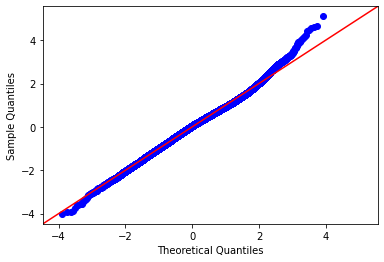

In [90]:
# Using a qq plot to check for normality of residuals
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True);

* Our models residuals are normally distributed with slight violations near the top tail. 
* The model is meets the normality condition.

### Checking For Homoscedasticity

In [91]:
X_data = data.drop('price', axis=1)

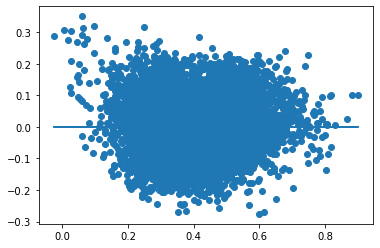

In [92]:
plt.scatter(model2.predict(X_data), model2.resid)
plt.plot(model2.predict(X_data), [0 for i in range(len(data))])

##### Comment:
There are no descernible patterns in the residuals showing that the homoscedasticity assumption has been met by our model.

In [95]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3209.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:45:52   Log-Likelihood:                 27176.
No. Observations:               21588   AIC:                        -5.433e+04
Df Residuals:                   21575   BIC:                        -5.422e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0390      0.004    -10.562      0.000      -0.046      -0.032
bedrooms       -0.0971      0.005    -18.002      0.000      -0.108      -0.087
bathrooms       0.0698      0.006     11.633      0.000       0.058       0.082
sqft_living     0.4015      0.009     45.702      0.000       0.384       0.419
sqft_lot       -0.0582      0.005    -11.771      0.000      -0.068      -0.048
grade           0.5812      0.008     77.023      0.000       0.566       0.596
yr_built       -0.1530      0.003    -57.970      0.000      -0.158      -0.148
flr_1_5         0.0041      0.002      2.276      0.023       0.001       0.008
flr_2_0         0.0058      0.001      4.343      0.000       0.003       0.008
flr_2_5         0.0146      0.006      2.634      0.008       0.004       0.026
flr_3_0         0.0425      0.003     13.073      0.000       0.036       0.049
wf_1_0          0.1256      0.006     21.786      0.000       0.114       0.137
cdn_5           0.0158      0.002      8.720      0.000       0.012       0.019
==============================================================================
Omnibus:                      125.996   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.118
Skew:                           0.012   Prob(JB):                     3.85e-41
Kurtosis:                       3.454   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusions:
**R Squared and Adjusted R Squared:**<br>
Our model has a R squared and Adjusted R squared value of 0.641 which indicates that our predictor variables can explain 64.1% of the target variable price. <br>

**P- Value for the F-Statistic:** <br>
Our p-value is 0.000 indicating that there is good linear relationship between our predictor variables and the target variable (price). <br>

**P- Value for the features:** <br>
All the selected predictor features have a p-value of less than 0.05 indicating their significance in predicting the target variable. <br>

**Parameter:** <br>
        **sqft_living (footage of the living space):** <br>
        With a coefficient of 0.4 from the model makes the feature positively correlated feature with price. A unit increase in the footage increases the house price by 0.4 units. <br>
        **grade (this is a grade given based on King County grading system):** <br>
        The feature has a coefficient of 0.58 showing a positive correlation with the price of the housing units. A unit increase in the grade given increase the price of the house unit by 0.5 unit. <br>
        **yr_built (built year):** <br>
        The feature has a coefficient of -0.153 showing a slight negative correlation with price. As the age of a house increases by one year, the price decreases by 0.15.
